In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable, List, Dict, Any, Set, FrozenSet, Iterable, Tuple
import math
import random
import networkx as nx
import sympy as sym

import pandas as pd
import os
import galois

from TC3_functions import *

#np.set_printoptions(threshold=20)

In [2]:
def Decoded(H, E):
    clean_syndrome = GF(np.zeros(H.shape[0], dtype=int))

    return (H @ E == clean_syndrome).all()

In [9]:
code1 = TC3(15,15)
code1.check_data_lists()
code1.parity_check()
code1.tanner_graph()
code1.logicals()

In [28]:
def cluster_neighbors(T, cluster):
    nbrs = set()
    for v in cluster:
        nbrs.update(set(nx.neighbors(T,v)))
    return nbrs

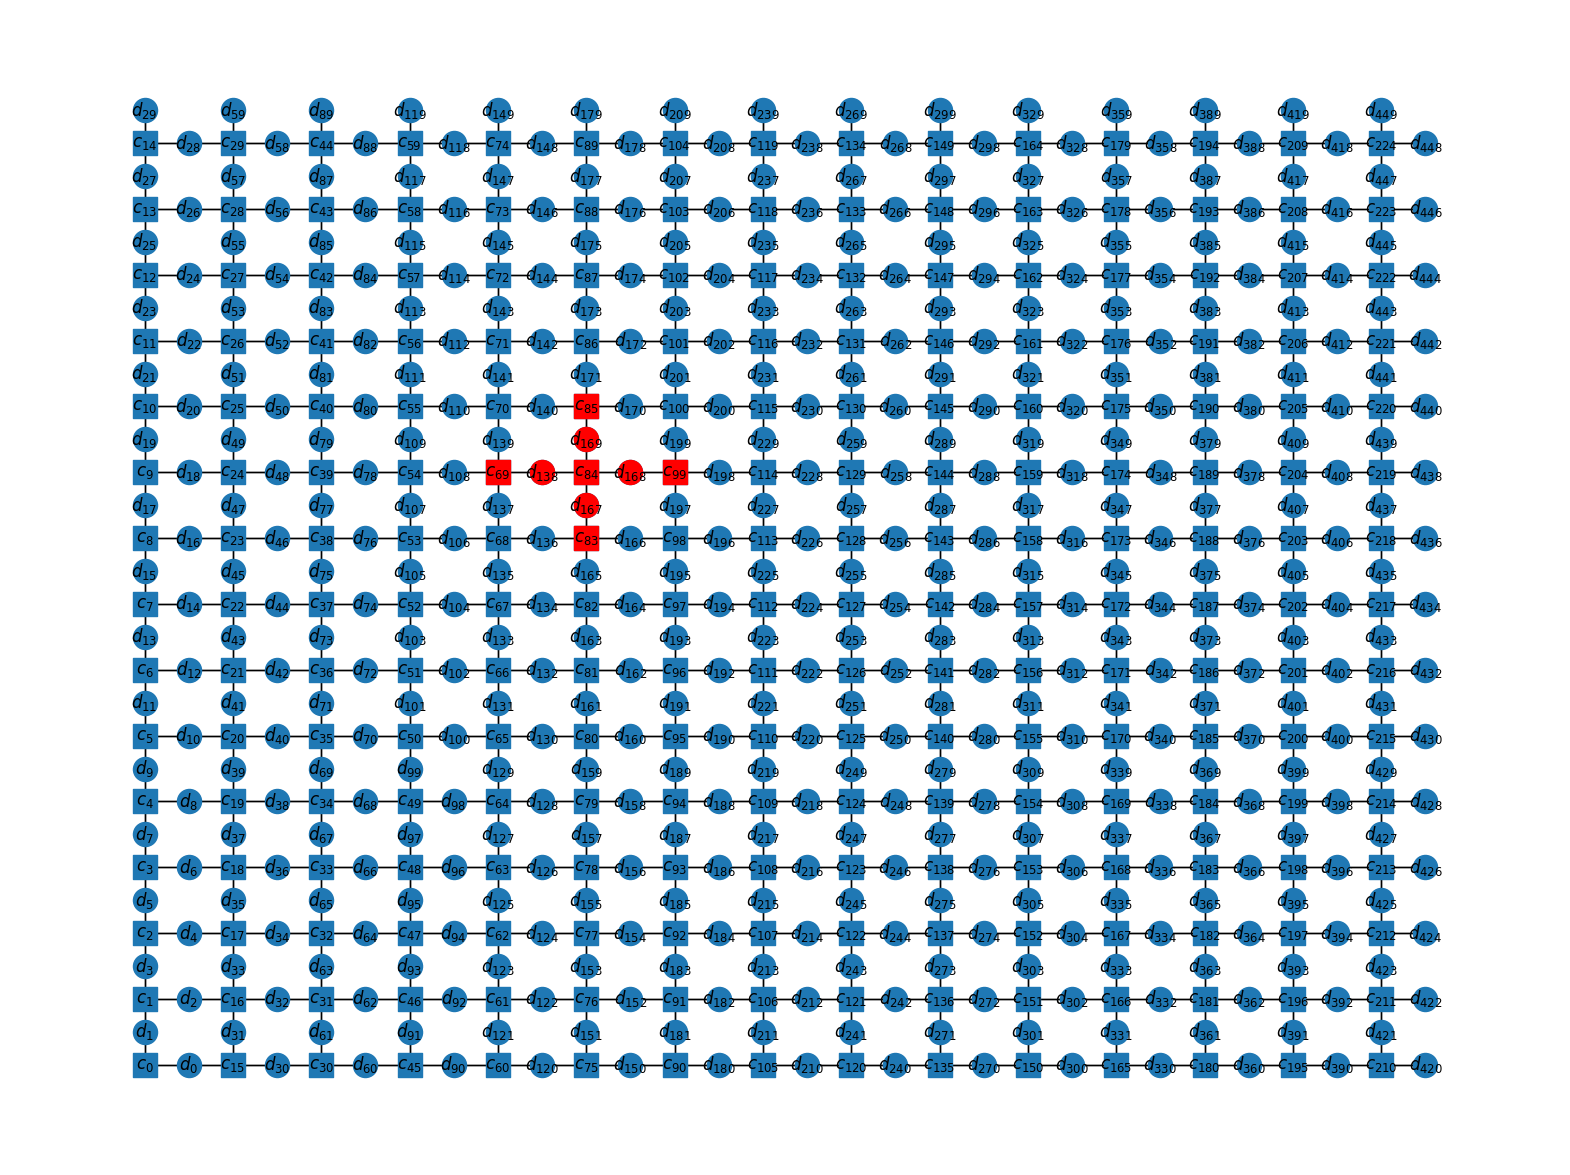

In [40]:
cluster = set([-85])
cluster.update(cluster_neighbors(code1.T, cluster))
cluster.update(cluster_neighbors(code1.T, cluster))
draw_tanner_graph(code1.T, mi2s(cluster))

{-17, -3, -2, -1, 1, 2, 3}

In [27]:
sorted(set(nx.neighbors(code1.T, 1)))

[-2, -1]

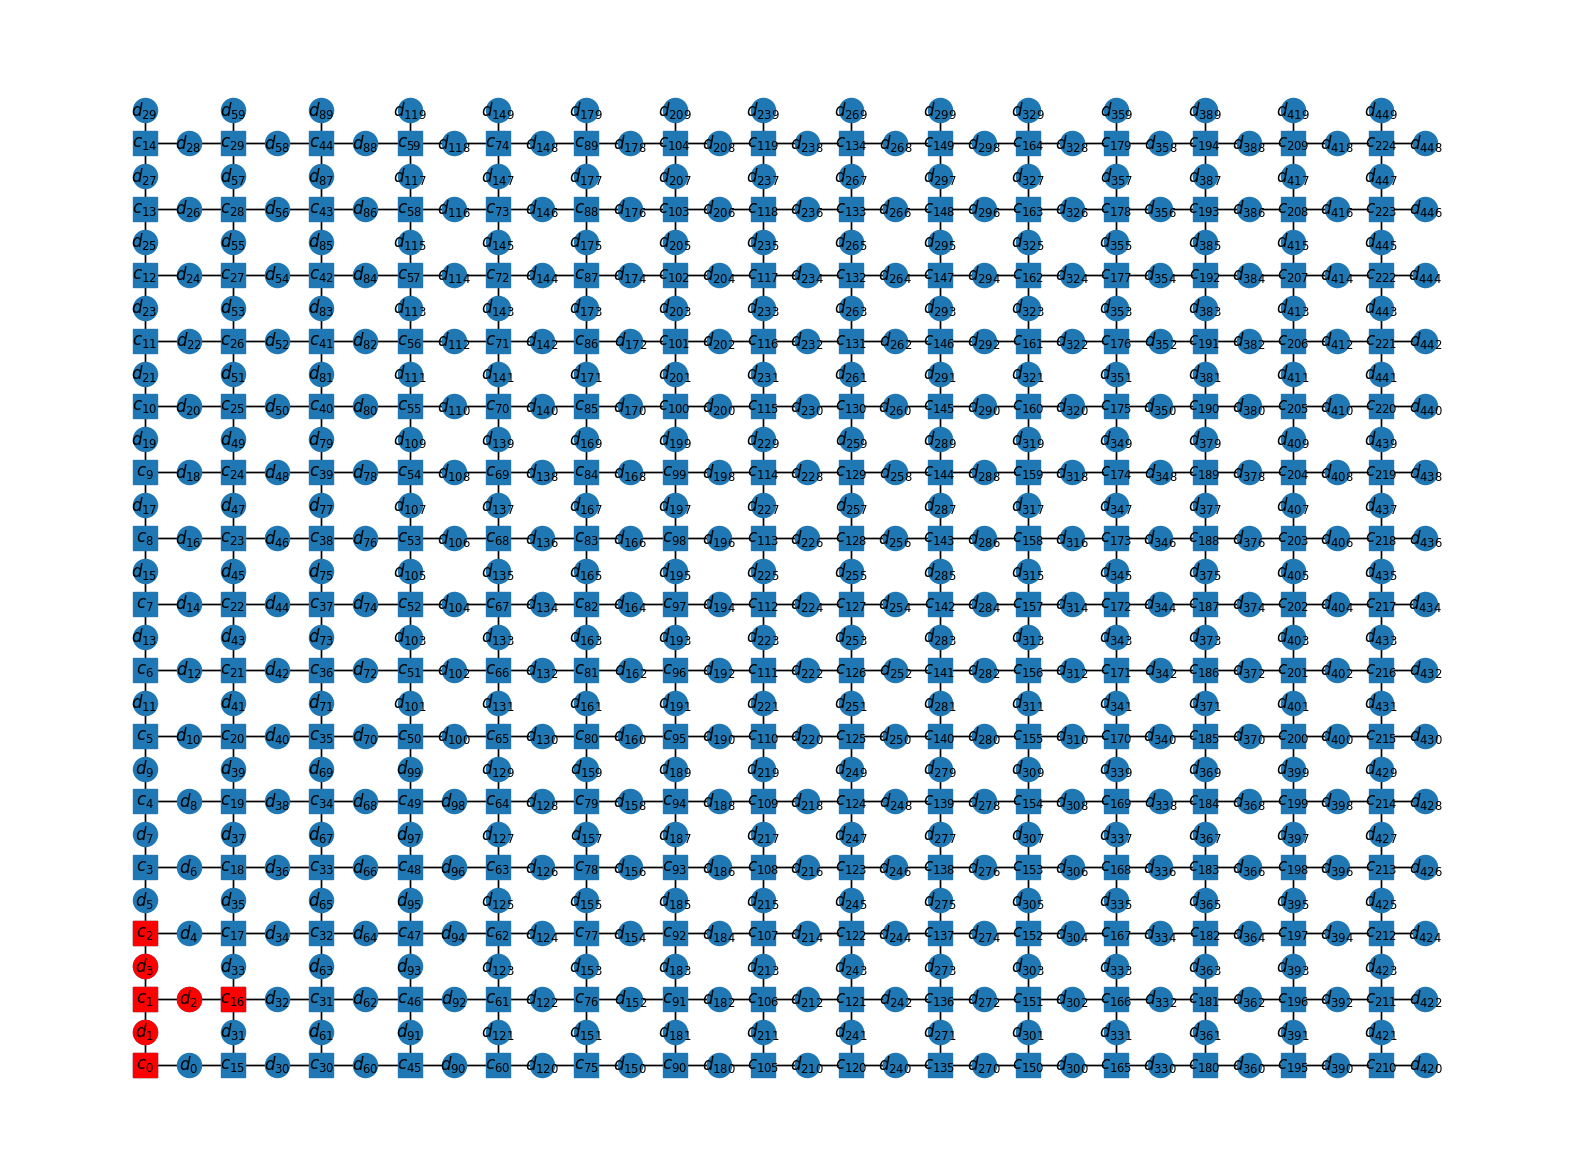

In [36]:
draw_tanner_graph(code1.T, mi2s(cluster))

In [4]:
e = Error(.01,code1.T.H)
S = syndrome(e, code1)
S_list = Bad_syndromes(e,code1)
clusters = merge_clusters(e, 4.1, code1)

e_corr = (cluster_decoder(e,code1))
Decoded(code1.H,e_corr)

True

In [5]:
fails = 0
for i in range(100):
    e = Error(.01,code1.T.H)
    S = syndrome(e, code1)
    cluster = merge_clusters(e, 6.1, code1)

    if len(cluster)>0:
        e_cluster = decode_cluster(S,cluster[0],code1)


        cluster_nodes = cluster[0][1]
    
        check_nodes = sorted([-node-1 for node in cluster_nodes if node<0])
        data_nodes = sorted([node for node in cluster_nodes if node>=0]) 
        H_sub = code1.H[check_nodes][:,data_nodes]
        



        if not (H_sub@(e_cluster[data_nodes]-e[data_nodes]) == GF(np.zeros(H_sub.shape[0], dtype=int))).all():
            fails +=1
            print(H_sub@(e_cluster[data_nodes]-e[data_nodes]))

print(f'fails: {fails}')

[0 0 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0
 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 1 2 0 1 0 0 0 0 0 0 0
 0 0 0 2 1 2 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 0 0
 0 0 0 0 1 2 0 0 0 0 0 0]
[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [6]:
fails

22

In [7]:
import time

t0 = time.time()

fails = 0
for i in range(100):
    e = Error(.05,code1.T.H)
    S = syndrome(e, code1)
    e_corr = cluster_decoder(e, code1)

    if not ((code1.H @ e_corr) == GF(np.zeros(code1.H.shape[0], dtype=int))).all():
        fails +=1
        print(code1.H @ e_corr)

print(f'fails: {fails}')

fails: 0


In [8]:
def solve_cluster1(H,S):
    #find random solution to He = S or move charge to single stabilizer
    n_data = H.shape[1]
    H_rank = np.linalg.matrix_rank(H)

    
    HS = np.hstack((H, np.atleast_2d(neutralize(H,S)).T)) #using neutralize function which eliminates need for skiping clusters
    #if solvable(H,S) == False:
        #raise Exception('something wrong, no solution')
    
    HSrr = HS.row_reduce()

    #swaps 
    swaps = []
    for i in range(min(HSrr.shape)):
        if HSrr[i,i] == 0:
            for j in range(i+1,n_data):
                if HSrr[i,j] != 0:
                    HSrr[:, [i,j]] = HSrr[:, [j,i]]
                    swaps.append((i,j))
                    break

    n_ind = n_data-H_rank
    ind_vars = GF(np.zeros(n_ind,dtype = int))

    dep_vars = -HSrr[:H_rank, H_rank:n_data] @ ind_vars + HSrr[:H_rank, -1]

    e = np.hstack((dep_vars, ind_vars))

    for s in reversed(swaps):
        e[s[0]], e[s[1]] = e[s[1]], e[s[0]]


    return GF(e), ind_vars, dep_vars

In [9]:
fails = 0
for i in range(100):
    e = Error(.4,code1.T.H)
    S = syndrome(e, code1)
    e_corr, ind, dep = solve_cluster1(code1.H, S)

    if not (code1.H@(e-e_corr) == GF(np.zeros(code1.H.shape[0], dtype=int))).all():
        fails +=1

print(f'fails: {fails}')

Some monte carlo

In [2]:
threshhold_dict = {}
N_list = [20,40]
for L in N_list:
    threshhold_dict[L] = []

In [3]:
p_list = [.005, .01, .02, .03, .05]


In [4]:
import time
t0 = time.time()

runs = {}
runs[20] = 10**3
runs[40] = 5*10**2

for L in N_list:

    codeL = TC3(L,L)
    codeL.check_data_lists()
    codeL.parity_check()
    codeL.tanner_graph()
    codeL.logicals()

    for i,p in enumerate(p_list):
        success, decoded_fail = [0, 0]
        for n in np.arange(runs[L]):
            e = Error(p,codeL.T.H)
            e_corr = cluster_decoder(e,codeL)

            if not ((codeL.H @ e_corr) == GF(np.zeros(codeL.H.shape[0], dtype=int))).all():
                decoded_fail +=1
                print(f'decode fail number {decoded_fail}')

            if (e_corr )@ GF(codeL.Z1) ==0 and (e_corr)@ GF(codeL.Z2) ==0:
                success+=1

            if n %int(runs[L]/10)==0:
                print(f'finished run {n} w/ prob {p} for L ={L} at time {(time.time()-t0)/60} mins with threshold {success/(n+1)}')
        
        threshhold_dict[L].append(success/(runs[L]))
        print(f'finished L ={L} at time {time.time()-t0} with failure threshold {success/(runs[L])}')
        print('======================================')

finished run 0 w/ prob 0.005 for L =6 at time 0.0005633473396301269 mins with threshold 1.0
finished run 200 w/ prob 0.005 for L =6 at time 0.010815898577372232 mins with threshold 0.9850746268656716
finished run 400 w/ prob 0.005 for L =6 at time 0.01956623395284017 mins with threshold 0.9875311720698254
finished run 600 w/ prob 0.005 for L =6 at time 0.0283372163772583 mins with threshold 0.9883527454242929
finished run 800 w/ prob 0.005 for L =6 at time 0.037645514806111655 mins with threshold 0.9900124843945068
finished run 1000 w/ prob 0.005 for L =6 at time 0.047154947121938066 mins with threshold 0.989010989010989
finished run 1200 w/ prob 0.005 for L =6 at time 0.05723619858423869 mins with threshold 0.9883430474604497
finished run 1400 w/ prob 0.005 for L =6 at time 0.06655811468760173 mins with threshold 0.9885795860099929
finished run 1600 w/ prob 0.005 for L =6 at time 0.07675243218739827 mins with threshold 0.9887570268582137
finished run 1800 w/ prob 0.005 for L =6 at tim

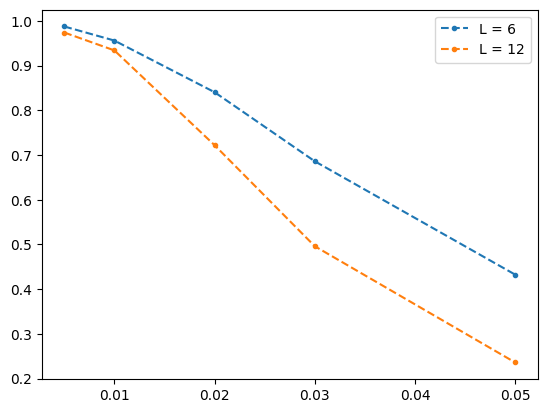

In [5]:
for L in N_list:
    plt.plot(p_list[:], threshhold_dict[L][:], '.--', label = f'L = {L}')

plt.legend()

In [6]:
runs = {}
runs[6] = 3
runs[20] = 3

In [7]:
np.arange(runs[6])

array([0, 1, 2])

In [8]:
1/.0005

2000.0